## Extreme Learning Machine (ELM)
#### Khoirunnisa Alfadistya - FGA Big Data Analytics Class B

#### Deskripsi Project : 
Penerapan ELM pada data Harga Barang X. Tujuan untuk membandingkan data aktual dan hasil prediksi dengan training testing menggunakan algoritma ELM pada data Harga Barang X

### Import Library

In [88]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import urllib.request

### Import Dataset

In [89]:
#download dataset di https://drive.google.com/uc?authuser=0&id=1sWKK5yU8h07KZ8wN6oW2TJUpNg2luQ6I&export=download
#save dalam file data.csv
#load dalam variabel dataset_
csv_url = 'https://drive.google.com/uc?authuser=0&id=1sWKK5yU8h07KZ8wN6oW2TJUpNg2luQ6I&export=download'
urllib.request.urlretrieve(csv_url, 'data.csv')
data = pd.read_csv('data1.csv')
dataset_ = pd.read_csv('data.csv',sep=';', header=None, names = ['Tanggal', 'Harga'])
dataset_.head()

,Tanggal,Harga
0,22 Maret 2017,98000
1,23 Maret 2017,74000
2,24 Maret 2017,74000
3,25 Maret 2017,74000
4,26 Maret 2017,74000


### Input Variabel

In [91]:
#Inputan variabel yg diperlukan untuk training ELM
persentase_data_training = int(input('Persentase Data Training (%) : '))
banyak_fitur = int(input('Banyak Fitur = '))
banyak_hidden_neuron = int(input('Banyak Hidden Neuron = '))

#NOTE
#persentase data training digunakan untuk membagi data yang akan digunakan sebagai data training
#sisanya digunakan sebagai data testing
#banyak fitur digunakan untuk membagi data awal menjadi k fitur

Persentase Data Training (%) : 90
Banyak Fitur = 4
Banyak Hidden Neuron = 5


In [80]:
dataset = pd.DataFrame(dataset_asli['Harga'])
minimum = int(dataset.min()-10000)
maksimum = int(dataset.max()+10000)
new_banyak_fitur = banyak_fitur + 1
hasil_fitur = []
for i in range((len(dataset)-new_banyak_fitur)+1):
	kolom = []
	j = i
	while j < (i+new_banyak_fitur):
		kolom.append(dataset.values[j][0])
		j += 1
	hasil_fitur.append(kolom)
hasil_fitur = np.array(hasil_fitur)
data_normalisasi = (hasil_fitur - minimum)/(maksimum - minimum)

data_training = data_normalisasi[:int(persentase_data_training*len(data_normalisasi)/100)]
data_testing = data_normalisasi[int(persentase_data_training*len(data_normalisasi)/100):]

In [81]:
#Training ELM
bobot = np.random.rand(banyak_hidden_neuron, banyak_fitur)
bias = np.random.rand(banyak_hidden_neuron)
h = 1/(1 + np.exp(-(np.dot(data_training[:, :banyak_fitur], np.transpose(bobot)) + bias)))
h_plus = np.dot(np.linalg.inv(np.dot(np.transpose(h),h)),np.transpose(h))
output_weight = np.dot(h_plus, data_training[:, banyak_fitur])



In [82]:
#Testing ELM
h = 1/(1 + np.exp(-(np.dot(data_testing[:, :banyak_fitur], np.transpose(bobot)) + bias)))
predict = np.dot(h, output_weight)
predict = predict * (maksimum - minimum) + minimum

#MAPE
aktual = np.array(hasil_fitur[int(persentase_data_training*len(data_normalisasi)/100):, banyak_fitur])
mape = np.sum(np.abs(((aktual - predict)/aktual)*100))/len(predict)
aktual

array([46400, 44800, 44600, 45400, 45400, 39600, 39600, 40400, 40400,
       39200, 39200, 38800, 37600, 39200, 35800, 36000, 38000, 37600,
       39200, 37200, 36200, 35600, 34600, 34200, 35000, 34600, 31800,
       31800, 32000, 30200, 28400, 28800, 28800, 28200, 31000, 31400,
       30000, 29600, 28800, 29600, 27800], dtype=int64)

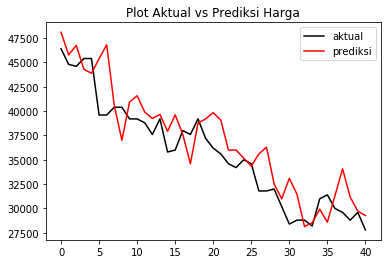

In [85]:
aktual = pd.DataFrame(aktual)
prediksi = pd.DataFrame(predict)
plt.plot(aktual, label='aktual',color='black')
plt.plot(prediksi, label='prediksi',color='red')
plt.title('Plot Aktual vs Prediksi Harga')
plt.legend()

In [87]:
print('Nilai MAPE : ',mape)

Nilai MAPE :  5.955863617870487
